## Map Price By Location

Have to get rid of top values (say our product will be for the average home buyer).

Or change scale to show quantiles

In [64]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

zipcode_data = df[['lat', 'long', 'price']]

#Remove Houses Over $3m
to_drop = zipcode_data.loc[(zipcode_data['price'] > 3000000)]
zipcode_data.drop(to_drop.index, axis=0, inplace=True)

street_map = gpd.read_file('Street_Address___st_address_line.shp')
crs = {'init': 'espg:4326'}
geometry = [Point(xy) for xy in zip(zipcode_data['long'], zipcode_data['lat'])]
geo_df = gpd.GeoDataFrame(zipcode_data, crs = crs, geometry = geometry)

/Users/jamesfay/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



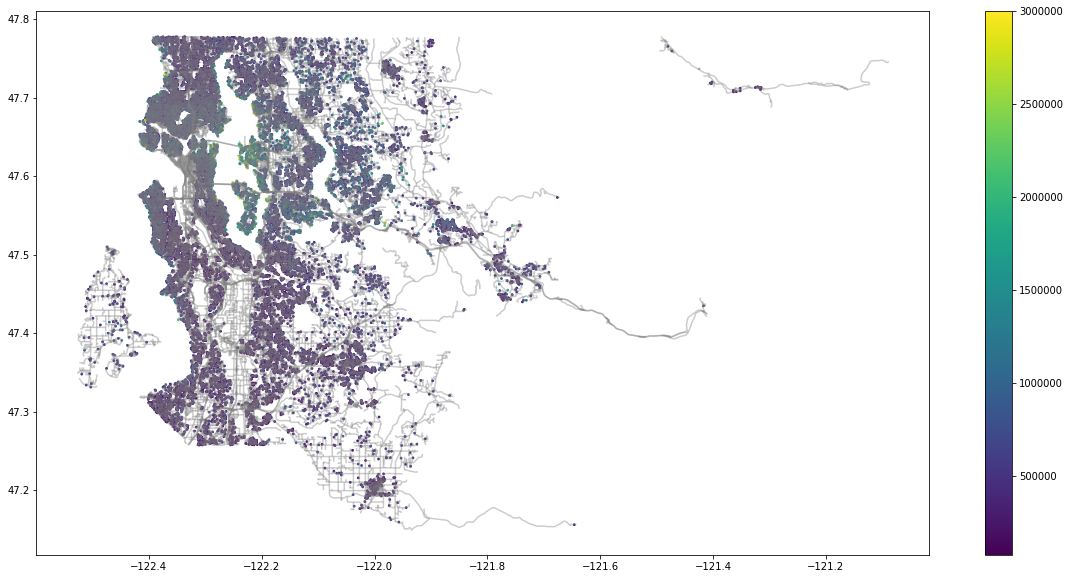

In [71]:
fig, ax = plt.subplots(figsize=(20,10))

street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df.plot(ax=ax, markersize=3, column='price', legend=True)